In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import numpy as np
import os
import glob

## Read BGI input

In [152]:
flistCM1 = [os.path.basename(x) for x in glob.glob('./input/das-tool/*CM1.results.tsv')]
flistCM2 = [os.path.basename(x) for x in glob.glob('./input/das-tool/*CM2.results.tsv')]

flistMx = [os.path.basename(x) for x in glob.glob('./input/*maxbin.CM1.results.tsv')]
flistMb = [os.path.basename(x) for x in glob.glob('./input/*metabat.CM1.results.tsv')]
flistVm = [os.path.basename(x) for x in glob.glob('./input/*vamb.CM1.results.tsv')]

flistMx

['V0O0SI.maxbin.CM1.results.tsv',
 'V4OKLR.maxbin.CM1.results.tsv',
 'VBCY6U.maxbin.CM1.results.tsv']

In [153]:
flistMb

['V0O0SI.metabat.CM1.results.tsv',
 'VBCY6U.metabat.CM1.results.tsv',
 'V4OKLR.metabat.CM1.results.tsv']

In [154]:
# Read and merge all CM files
COLUMN_CM = ['vkood','CM','HQ', 'MQ', 'LQ']
cmSTAT = pd.DataFrame(columns=COLUMN_CM)

for smpl1 in flistCM1:
    data = pd.read_csv('input/das-tool/'+smpl1, sep='\t')

    conditions = [(data['Completeness'] > 90) & (data['Contamination'] < 5),
        (data['Completeness'] <= 90) & (data['Completeness'] >= 50) | \
        (data['Contamination'] >= 5) & (data['Contamination'] < 10),
        (data['Completeness'] < 50) | (data['Contamination'] > 10)]

    values = ['HQ', 'MQ', 'LQ']
    data['Bin_qual'] = np.select(conditions, values)

    cnt = data['Bin_qual'].value_counts()
    cnt['vkood'] = smpl1[0:6]
    cnt['CM'] = 'CM1.Das-tool'
    cmSTAT = cmSTAT.append(cnt)
    
    
for smpl2 in flistMb:
    data = pd.read_csv('input/'+smpl2, sep='\t')

    conditions = [(data['Completeness'] > 90) & (data['Contamination'] < 5),
        (data['Completeness'] <= 90) & (data['Completeness'] >= 50) | \
        (data['Contamination'] >= 5) & (data['Contamination'] < 10),
        (data['Completeness'] < 50) | (data['Contamination'] > 10)]

    values = ['HQ', 'MQ', 'LQ']
    data['Bin_qual'] = np.select(conditions, values)

    cnt = data['Bin_qual'].value_counts()
    cnt['vkood'] = smpl2[0:6]
    cnt['CM'] = 'CM1.Metabat'
    cmSTAT = cmSTAT.append(cnt)
    
for smpl3 in flistMx:
    data = pd.read_csv('input/'+smpl3, sep='\t')

    conditions = [(data['Completeness'] > 90) & (data['Contamination'] < 5),
        (data['Completeness'] <= 90) & (data['Completeness'] >= 50) | \
        (data['Contamination'] >= 5) & (data['Contamination'] < 10),
        (data['Completeness'] < 50) | (data['Contamination'] > 10)]

    values = ['HQ', 'MQ', 'LQ']
    data['Bin_qual'] = np.select(conditions, values)

    cnt = data['Bin_qual'].value_counts()
    cnt['vkood'] = smpl2[0:6]
    cnt['CM'] = 'CM1.Maxbin'
    cmSTAT = cmSTAT.append(cnt)
    
for smpl4 in flistVm:
    data = pd.read_csv('input/'+smpl4, sep='\t')

    conditions = [(data['Completeness'] > 90) & (data['Contamination'] < 5),
        (data['Completeness'] <= 90) & (data['Completeness'] >= 50) | \
        (data['Contamination'] >= 5) & (data['Contamination'] < 10),
        (data['Completeness'] < 50) | (data['Contamination'] > 10)]

    values = ['HQ', 'MQ', 'LQ']
    data['Bin_qual'] = np.select(conditions, values)

    cnt = data['Bin_qual'].value_counts()
    cnt['vkood'] = smpl2[0:6]
    cnt['CM'] = 'CM1.Vamb'
    cmSTAT = cmSTAT.append(cnt)

In [157]:
cmSTAT['CM'].unique()

array(['CM1.Das-tool', 'CM1.Metabat', 'CM1.Maxbin', 'CM1.Vamb'],
      dtype=object)

In [158]:
mlt = pd.melt(cmSTAT, id_vars =['vkood','CM'], value_vars =['HQ','MQ','LQ'])
mlt.head(2)

,vkood,CM,variable,value
0,V40FOF,CM1.Das-tool,HQ,16
1,V61GT1,CM1.Das-tool,HQ,44


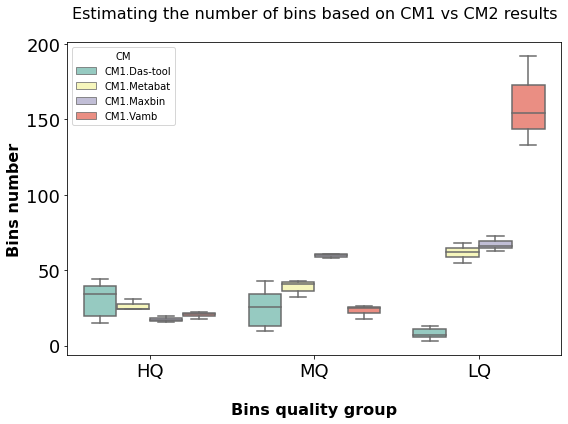

In [159]:
plt.figure(figsize=(8, 6))
my_pal = {"CM1": "g", "CM2": "b"}
#plt.rcParams['axes.labelsize'] = 16

#sns.boxplot(y="HQ", x='vkood', data=cmSTAT, color='pink')
ax = sns.boxplot(y="value", x='variable', hue='CM', data=mlt, palette="Set3")
#ax = sns.swarmplot(y="value", x='variable', hue='CM', data=mlt, palette=my_pal, dodge=True)
plt.title("Estimating the number of bins based on CM1 vs CM2 results"+'\n', fontsize=16)
plt.xlabel('\n'+'Bins quality group', fontweight='bold')
plt.ylabel('Bins number', fontweight='bold')
ax.tick_params(labelsize = 18)

plt.tight_layout()
plt.savefig('results/Single_vs_Multi.svg')

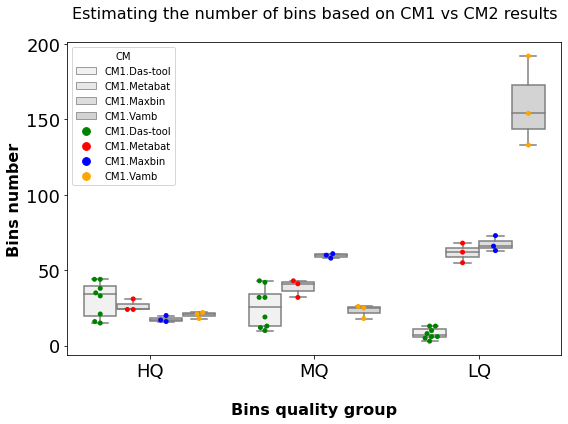

In [160]:
plt.figure(figsize=(8, 6))
my_pal = {"CM1.Das-tool": "g", "CM1.Maxbin": "b", "CM1.Metabat": "r", "CM1.Vamb": "orange"}
#plt.rcParams['axes.labelsize'] = 16

#sns.boxplot(y="HQ", x='vkood', data=cmSTAT, color='pink')
ax = sns.boxplot(y="value", x='variable', hue='CM', data=mlt, color="lightgrey")
ax = sns.swarmplot(y="value", x='variable', hue='CM', data=mlt, palette=my_pal, dodge=True)
plt.title("Estimating the number of bins based on CM1 vs CM2 results"+'\n', fontsize=16)
plt.xlabel('\n'+'Bins quality group', fontweight='bold')
plt.ylabel('Bins number', fontweight='bold')
ax.tick_params(labelsize = 18)

plt.tight_layout()
plt.savefig('results/Single_vs_Multi1.svg')

In [ ]:
plt.figure(figsize=(8, 6))
my_pal = {"CM1.Das-tool": "g", "CM1.Maxbin": "b", "CM1.Metabat": "r", "CM1.Vamb": "orange"}
#plt.rcParams['axes.labelsize'] = 16

#sns.boxplot(y="HQ", x='vkood', data=cmSTAT, color='pink')
ax = sns.boxplot(y="value", x='variable', hue='CM', data=mlt, color="lightgrey")
ax = sns.swarmplot(y="value", x='variable', hue='CM', data=mlt, palette=my_pal, dodge=True)
plt.title("Estimating the number of bins based on CM1 vs CM2 results"+'\n', fontsize=16)
plt.xlabel('\n'+'Bins quality group', fontweight='bold')
plt.ylabel('Bins number', fontweight='bold')
ax.tick_params(labelsize = 18)

plt.tight_layout()
plt.savefig('results/Single_vs_Multi1.svg')

In [164]:
cmSTAT.head(2)

,vkood,CM,HQ,MQ,LQ
Bin_qual,V40FOF,CM1.Das-tool,16,32,6
Bin_qual,V61GT1,CM1.Das-tool,44,42,13


In [163]:
mlt.head(2)

,vkood,CM,variable,value
0,V40FOF,CM1.Das-tool,HQ,16
1,V61GT1,CM1.Das-tool,HQ,44


In [161]:
mlt2 = pd.melt(cmSTAT, id_vars =['vkood','HQ','MQ','LQ'], value_vars =['CM'])
mlt2.head(2)

,vkood,HQ,MQ,LQ,variable,value
0,V40FOF,16,32,6,CM,CM1.Das-tool
1,V61GT1,44,42,13,CM,CM1.Das-tool


In [40]:
data = pd.read_csv('input/BGIset_SmplAssemblyInfo.csv', header=None, sep=' ')
data = data[[0,4,7,13,16,19,1,2]]
data = data.rename(columns={0: "vkood", 4: "contigs_number", 7: "assembly_length", 13: "max_cont_len", 
                            16: "avg_cont_len", 19: "N50", 1: "data_creation", 2: "time_creation"})
data["vkood"] = data["vkood"].str.replace("assembly_","")
data.tail()

,vkood,contigs_number,assembly_length,max_cont_len,avg_cont_len,N50,data_creation,time_creation
1902,VZWEWM,322270,523197918,711252,1623,6277,2022-08-06,23:48:53
1903,VZXIHP,444122,650800875,644510,1465,3993,2022-07-28,16:24:24
1904,VZY957,258022,405505920,605936,1571,4968,2022-08-28,15:23:40
1905,VZYSJ2,118428,202543399,717098,1710,7097,2022-08-26,10:39:18
1906,VZZW6V,375477,452999445,761826,1206,2058,2022-08-23,18:00:37


In [44]:
data['cont_ths'] = data['contigs_number']/1000
data['ass_mln'] = data['assembly_length']/1000000

In [47]:
print('Total contigs number: '+str(data['contigs_number'].sum()))
print('Average contigs number per sample: '+str(data['contigs_number'].mean()))
print('\n'+'Average metagenome size: '+str(data['ass_mln'].mean())+' mln')

Total contigs number: 529027628
Average contigs number per sample: 277413.5437860514

Average metagenome size: 416.58138548400655 mln


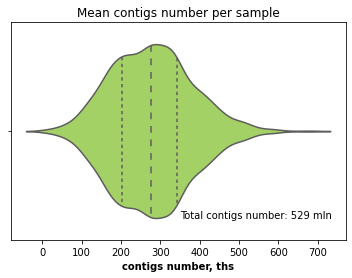

In [39]:
sns.violinplot(data=data, x='cont_ths', inner="quartile", color='#a7e354')
plt.title("Mean contigs number per sample")
plt.xlabel('contigs number, ths', fontweight='bold')
plt.text(350,0.4,'Total contigs number: 529 mln')

plt.savefig('results/Contigs_number.jpg', dpi=150)

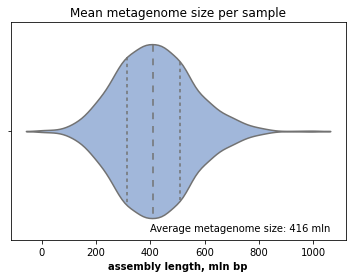

In [51]:
sns.violinplot(data=data, x='ass_mln', inner="quartile", color='#98b5e3')
plt.title("Mean metagenome size per sample")
plt.xlabel('assembly length, mln bp', fontweight='bold')
plt.text(400,0.46,'Average metagenome size: 416 mln')

plt.savefig('results/Assembly_length.jpg', dpi=150)

In [5]:
data.to_csv('results/BGIset_SmplAssemblyInfo_m.csv', index=False)

In [6]:
st =data['data_creation'].value_counts(sort=False).to_frame()
st = st.sort_index(ascending=True)
st.head()

,data_creation
2022-05-10,2
2022-05-11,12
2022-05-12,10
2022-05-13,4
2022-05-14,10
